In [2]:
from sys import path

path.append('/home/erik/software/')
from rollout_plotter import MCC

In [3]:
class Structure:
    def __init__(self, name, seq, actual):
        self.name = name
        self.seq = seq
        self.structure = actual
        self.family = name.split('_')[0]
        
        self.spot = None
        self.contra = None
        self.expert = None
        
        self.spot_MCC = None
        self.contra_MCC = None
        self.expert_MCC = None

In [4]:
# Create a hash table of structures identified by sequence since I don't trust names 
structures = {}
active_dataset = 'rfam'
#active_dataset = 'matthews'
with open('actual/actual_'+active_dataset+'.csv', 'r') as f:
    for l in f.readlines():
        l = l.strip().split(',')
        seq = l[1]
        if not seq in structures.keys():
            structures[seq] = Structure(l[0], l[1], MCC.parse_dot_bracket(l[2]))
        else:
            print('Double sequence found:\n',
                 structures[seq].name, ':', structures[seq].seq, '\n',
                 l[0], ':', seq)

with open('expertRNA/expertRNA_'+active_dataset+'.csv') as f:
    for l in f.readlines():
        l = l.strip().split(',')
        seq = l[1]
        if not isinstance(structures[seq].expert, str): #there were duplicates in actual, so there are duplicates here too.
            structures[seq].expert = MCC.parse_dot_bracket(l[2])
            
with open('spot/spot_'+active_dataset+'.csv') as f:
    for l in f.readlines():
        l = l.strip().split(',')
        seq = l[1]
        try:
            if not isinstance(structures[seq].spot, str):
                structures[seq].spot = MCC.parse_dot_bracket(l[2])
        except:
            print('BAD SPOT FILE:', l[0])
            
with open('contrafold/contrafold_'+active_dataset+'.csv') as f:
    for l in f.readlines():
        l = l.strip().split(',')
        seq = l[1]
        try:
            if not isinstance(structures[seq].contra, str):
                structures[seq].contra = MCC.parse_dot_bracket(l[2])
        except:
            print('BAD CONTRA FILE:', l[0])

Double sequence found:
 5s_Candidatus-Portiera-aleyrodidarum-1_0.17 : AGCUUGACGAAUAUAGUUUGUGGGACCAACCUGAAACCAUUCCGAACUCAGAAGUUAAAUCACCUAACGCCUAUGGUAGUAUGAGGUUCUCCUCAUGUGAGAGUAGGUUAUCGUCAGGCUA 
 5s_Candidatus-Portiera-aleyrodidarum-1_0.28 : AGCUUGACGAAUAUAGUUUGUGGGACCAACCUGAAACCAUUCCGAACUCAGAAGUUAAAUCACCUAACGCCUAUGGUAGUAUGAGGUUCUCCUCAUGUGAGAGUAGGUUAUCGUCAGGCUA
Double sequence found:
 tmRNA_Myxo.xant._TRW-34_1-366_0.19 : GGGGGCGACCUGGUUUCGACGGGGGCAUUGAAGUUCGAGACGCGUGCCGAGCUUGUCAGGUAGCUCGUAAAUUCAACCCGGCAAAGACACAAAAGCCAACGACAACGUUGAGCUCGCGCUGGCUGCCUAAAAACAGCCCAUAGUGCGCGGUCCCCCCGCCCUCGGCCUGUGGGGUUGGGACAGACCGUCAUAAUGCAGGCUGGCUGCCGAGGGUGCCUGGACCCGAGGUGGCGAGAUCUUCCCAGGACCGGCUCUGAGUAUCCCGUCCGUGGGAGCCUCAGGGACGUAGCAAAUCGCGGACUACGCACGUAGGGUCGAAGAGCGGACGGCUUUCGGACGCGGGUUCGAUUCCCGCCGCCUCCACUG 
 tmRNA_Myxo.xant._TRW-34_1-366_0.56 : GGGGGCGACCUGGUUUCGACGGGGGCAUUGAAGUUCGAGACGCGUGCCGAGCUUGUCAGGUAGCUCGUAAAUUCAACCCGGCAAAGACACAAAAGCCAACGACAACGUUGAGCUCGCGCUGGCUGCCUAAAAACAGCCCAUAGUGCGCGGUCCCCCCGCCCUCGGCCUGUG

In [6]:
from os import chdir

In [7]:
chdir('../forna_colormaps')
for k in structures.keys():
    structures[k].expert_MCC = MCC.calc_MCC(structures[k].expert, structures[k].structure, structures[k].name, 1, 'expert')
    if structures[k].spot is not None: #spot is missing some entries because of duplicates in training set
        structures[k].spot_MCC = MCC.calc_MCC(structures[k].spot, structures[k].structure, structures[k].name, 1, 'spot')
    structures[k].contra_MCC = MCC.calc_MCC(structures[k].contra, structures[k].structure, structures[k].name, 1, 'contra')

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams.update({'font.size': 12, 'lines.markersize' : 2})
mpl.rc('text', usetex=True)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
W2 = np.array(plt.rcParams["figure.figsize"])*2.6/plt.rcParams["figure.figsize"][0] #for 2 graphs across with the same width as the text column in PLOS
W3 = np.array(plt.rcParams["figure.figsize"])*2.5/plt.rcParams["figure.figsize"][0] #for 3 graphs across the whole page in PLOS
Weq2H = np.array([10, 5])

123
123


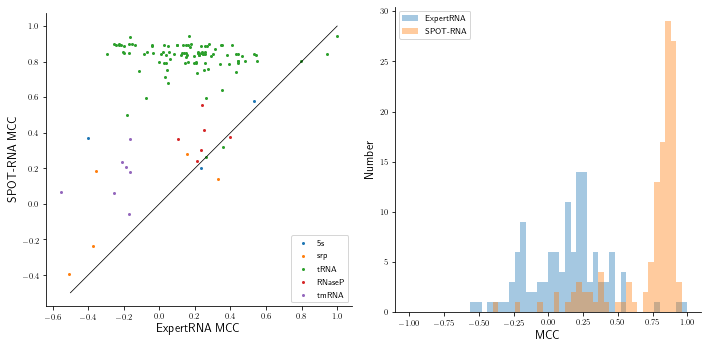

In [9]:
chdir('../graphs')

fnames = ['5s', 'srp', 'tRNA', 'RNaseP', 'tmRNA']
x = [[], [], [], [], []]
y = [[], [], [], [], []]
for k in structures.keys():
    if structures[k].spot is not None:
        x[fnames.index(structures[k].family)].append(structures[k].expert_MCC)
        y[fnames.index(structures[k].family)].append(structures[k].spot_MCC)



fig, ax = plt.subplots(1, 2, figsize=Weq2H)
line = np.linspace(-0.5, 1, 20)
ax[0].plot(line, line, c='k', linewidth=0.75)
ax[0].set_xlabel("ExpertRNA MCC")
ax[0].set_ylabel("SPOT-RNA MCC")

for i, f in enumerate(fnames):
    if len(x[i]) != 0:
        ax[0].scatter(x[i], y[i], label=f)
        
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)  
ax[0].axis('scaled') 
ax[0].legend(fontsize=8)

print(len([X for sl in x for X in sl]))
print(len([Y for sl in y for Y in sl]))

ax[1].hist([X for sl in x for X in sl], bins=50, range=(-1, 1), alpha=0.4, label="ExpertRNA")
ax[1].hist([Y for sl in y for Y in sl], bins=50, range=(-1, 1), alpha=0.4, label="SPOT-RNA")
ax[1].set_xlabel("MCC")
ax[1].set_ylabel("Number")

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)   
ax[1].legend(fontsize=8)

plt.tight_layout()

        
plt.savefig('expert_vs_spot_'+active_dataset+'.png', dpi=600)

131
131


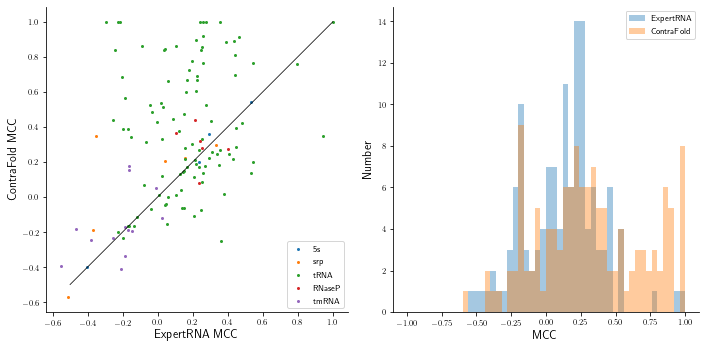

In [11]:
x = [[], [], [], [], []]
y = [[], [], [], [], []]
for k in structures.keys():
    x[fnames.index(structures[k].family)].append(structures[k].expert_MCC)
    y[fnames.index(structures[k].family)].append(structures[k].contra_MCC)
    
fig, ax = plt.subplots(1, 2, figsize=Weq2H)
line = np.linspace(-0.5, 1, 20)
ax[0].plot(line, line, c='k', linewidth=0.75)
ax[0].set_xlabel("ExpertRNA MCC")
ax[0].set_ylabel("ContraFold MCC")


for i, f in enumerate(fnames):
    if len(x[i]) != 0:
        ax[0].scatter(x[i], y[i], label=f)

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)  
ax[0].axis('scaled')  
ax[0].legend(fontsize=8)

print(len([X for sl in x for X in sl]))
print(len([Y for sl in y for Y in sl]))


ax[1].hist([X for sl in x for X in sl], bins=50, range=(-1, 1), alpha=0.4, label="ExpertRNA")
ax[1].hist([Y for sl in y for Y in sl], bins=50, range=(-1, 1), alpha=0.4, label="ContraFold")
ax[1].set_xlabel("MCC")
ax[1].set_ylabel("Number")

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)   
ax[1].legend(fontsize=8)

plt.tight_layout()

        
plt.savefig('expert_vs_contra_'+active_dataset+'.png', dpi=600)

In [49]:
chdir('../comparison')